# Akash patil
aakashgolu1008@gmail.com


# Task 2: Breast Cancer Wisconsin (Diagnostic)

## Dataset: Breast Cancer Wisconsin (Diagnostic)

Description:
This task involves working with the Breast Cancer Wisconsin
(Diagnostic) dataset, which contains features computed from breast

mass images. The dataset is used to diagnose whether a breast mass
is malignant or benign, making it a binary classification problem.

1. Data Exploration:

- Begin by exploring the dataset to understand its structure and features.
    Check for missing data and outliers.

2. Data Preprocessing:

- Preprocess the data by handling missing values and standardizing
    features.

3. Model Building: 

- Choose and implement machine learning algorithms for classification, such
    as logistic regression, support vector machines, random forests, or others.
4. Model Evaluation:

- Evaluate the performance of your model using appropriate metrics like accuracy, precision,
    recall, and Fl-score.

5. Model Tuning:
- Experiment with hyperparameter tuning to optimize model performance.

6. Documentation:

- Create a report documenting your approach, findings, and the rationale behind your model
    choices.


## Importing the dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV


In [2]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv("data.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

## 1. Data Exploration:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Observations-
- **Total Entries:** 569
- **Columns:** 33 columns
- **Column Types:** 1 integer, 1 object (diagnosis), and 31 float64
- **Missing Values:** Column "Unnamed: 32" has no non-null values (potentially irrelevant column)

The dataset seems relatively clean with no missing values except for the "Unnamed: 32" column, which appears to have no useful data. It might be beneficial to drop or further investigate that column. 

The dataset contains various features related to breast cancer diagnosis, such as mean, standard error, and worst values of attributes like radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension.

Do you want to perform any specific analysis or exploration on this dataset? Perhaps identifying correlations, visualizing distributions, or investigating patterns related to the diagnosis column? Let me know what you'd like to explore further!

In [5]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [6]:
df.describe(include="O")

diagnosis
count        569
unique         2
top            B
freq         357

## Observations-
- For categorical column `diagnosis`:
  - There are 569 entries.
  - It has two unique values: 'B' and 'M'.
  - 'B' occurs 357 times, indicating benign cases might significantly outnumber malignant ones.

- For numerical columns:
  - The statistics provide insights into the distribution and variability of each numerical attribute.
  - For instance, looking at `radius_mean`:
    - The mean value is approximately 14.13 with a standard deviation of about 3.52.
    - The minimum radius mean is 6.98, and the maximum is 28.11.
    - The quartile values (25th, 50th, and 75th percentiles) give an idea about the distribution's spread.


In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

1. **Missing Values:**
   - Overall, the dataset is well-maintained with minimal missing values.
   - However, the column "Unnamed: 32" appears to have no useful data and contains only missing values.

2. **Categorical to Numerical Transformation:**
   - The dataset's primary categorical variable, "diagnosis," has been efficiently encoded into numerical values.
   - The 'B' (Benign) class is predominant, occurring 357 times, while the 'M' (Malignant) class is present 212 times.


3. **Outlier Identification:**
   - outlier points were present across various features.
   - These outliers, although present, haven't been removed due to the limited number of observations.

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, Unnamed: 32]
Index: []

## 2. Data Preprocessing:

In [9]:
df = df.drop("Unnamed: 32", axis=1)

In [10]:
df["diagnosis"]=df["diagnosis"].map({"B":0,"M":1})

In [11]:
df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302          1       17.990         10.38          122.80   
1       842517          1       20.570         17.77          132.90   
2     84300903          1       19.690         21.25          130.00   
3     84348301          1       11.420         20.38           77.58   
4     84358402          1       20.290         14.34          135.10   
5       843786          1       12.450         15.70           82.57   
6       844359          1       18.250         19.98          119.60   
7     84458202          1       13.710         20.83           90.20   
8       844981          1       13.000         21.82           87.50   
9     84501001          1       12.460         24.04           83.97   
10      845636          1       16.020         23.24          102.70   
11    84610002          1       15.780         17.89          103.60   
12      846226          1       19.170         24.80          132.40   
13      846381          1       15.850         23.95          103.70   
14    84667401          1       13.730         22.61           93.60   
15    84799002          1       14.540         27.54           96.73   
16      848406          1       14.680         20.13           94.74   
17    84862001          1       16.130         20.68          108.10   
18      849014          1       19.810         22.15          130.00   
19     8510426          0       13.540         14.36           87.46   
20     8510653          0       13.080         15.71           85.63   
21     8510824          0        9.504         12.44           60.34   
22     8511133          1       15.340         14.26          102.50   
23      851509          1       21.160         23.04          137.20   
24      852552          1       16.650         21.38          110.00   
25      852631          1       17.140         16.40          116.00   
26      852763          1       14.580         21.53           97.41   
27      852781          1       18.610         20.25          122.10   
28      852973          1       15.300         25.27          102.40   
29      853201          1       17.570         15.05          115.00   
30      853401          1       18.630         25.11          124.80   
31      853612          1       11.840         18.70           77.93   
32    85382601          1       17.020         23.98          112.80   
33      854002          1       19.270         26.47          127.90   
34      854039          1       16.130         17.88          107.00   
35      854253          1       16.740         21.59          110.10   
36      854268          1       14.250         21.72           93.63   
37      854941          0       13.030         18.42           82.61   
38      855133          1       14.990         25.20           95.54   
39      855138          1       13.480         20.82           88.40   
40      855167          1       13.440         21.58           86.18   
41      855563          1       10.950         21.35           71.90   
42      855625          1       19.070         24.81          128.30   
43      856106          1       13.280         20.28           87.32   
44    85638502          1       13.170         21.81           85.42   
45      857010          1       18.650         17.60          123.70   
46    85713702          0        8.196         16.84           51.71   
47       85715          1       13.170         18.66           85.98   
48      857155          0       12.050         14.63           78.04   
49      857156          0       13.490         22.30           86.91   
50      857343          0       11.760         21.60           74.72   
51      857373          0       13.640         16.34           87.21   
52      857374          0       11.940         18.24           75.71   
53      857392          1       18.220         18.70          120.30   
54      857438          1       15.100         22.02

In [12]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

- On this dataset, we perform three primary operations. 
    - Firstly, we analyze how features are distributed concerning "M" (malignant) and "B" (benign). 
    - Secondly, we assess multicollinearity among features. 
    - Thirdly, we identify the most important features. Based on these analyses, we make decisions on which features to retain and which ones to drop.

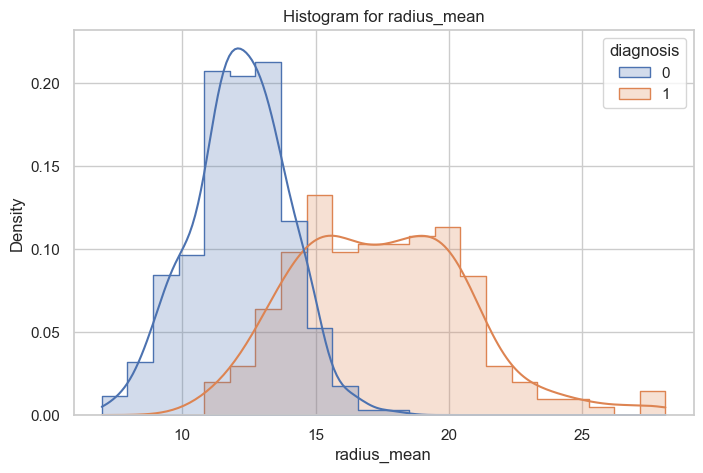

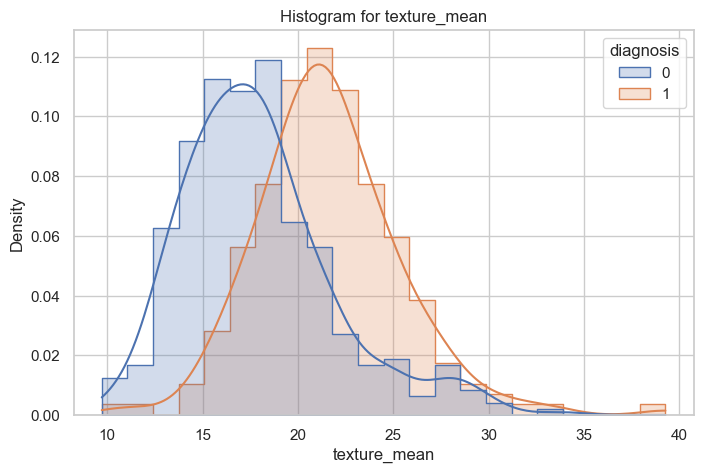

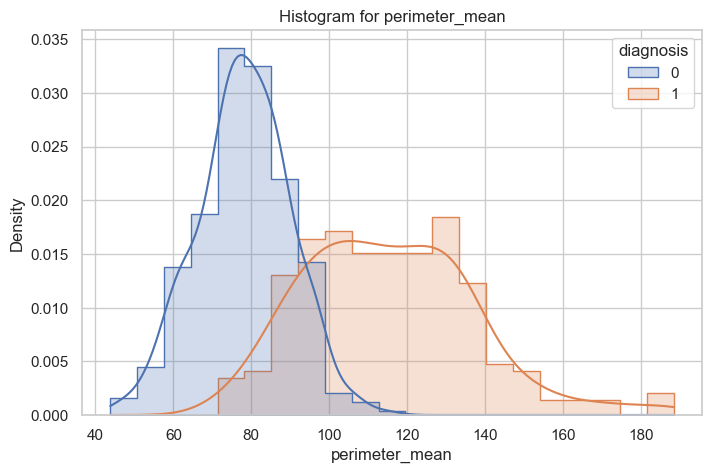

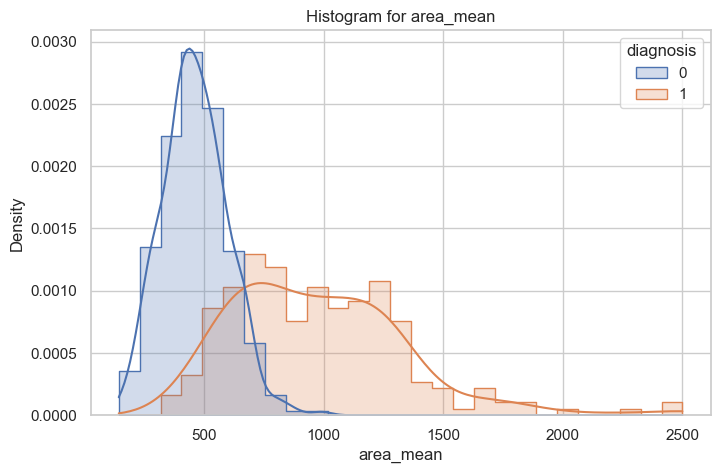

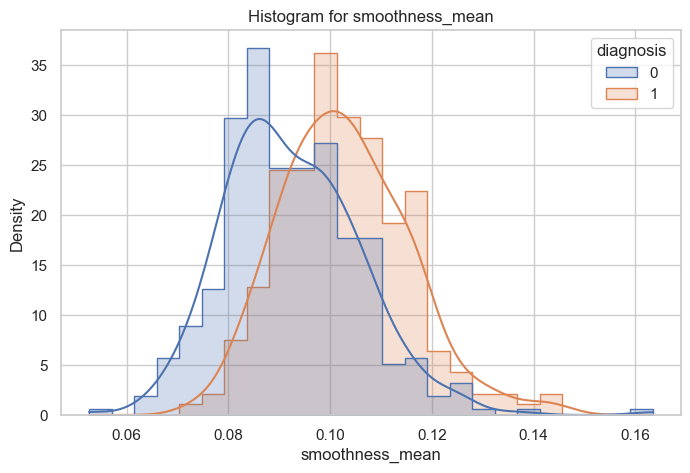

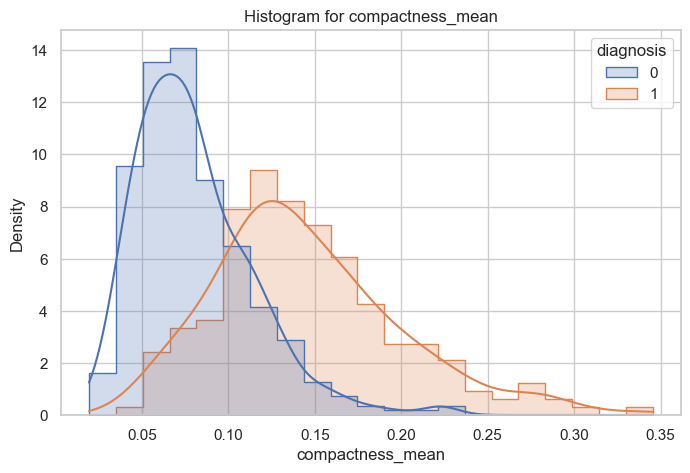

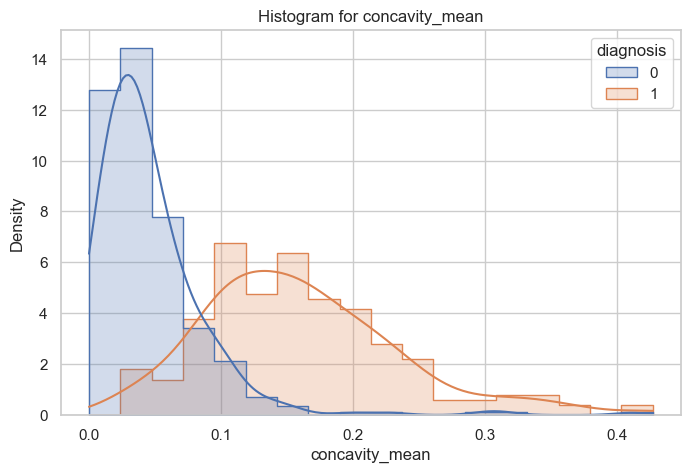

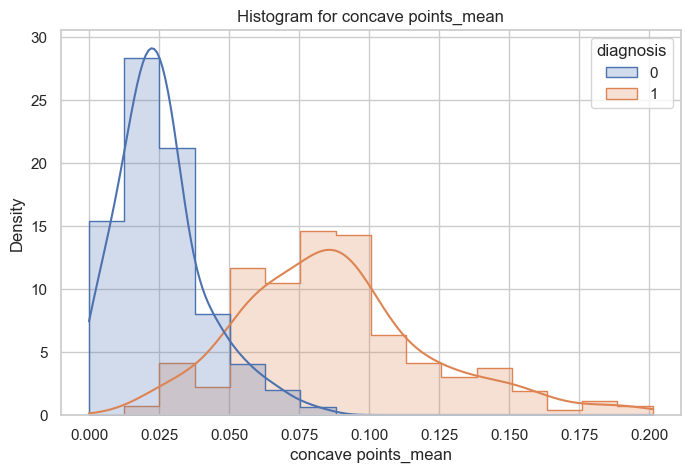

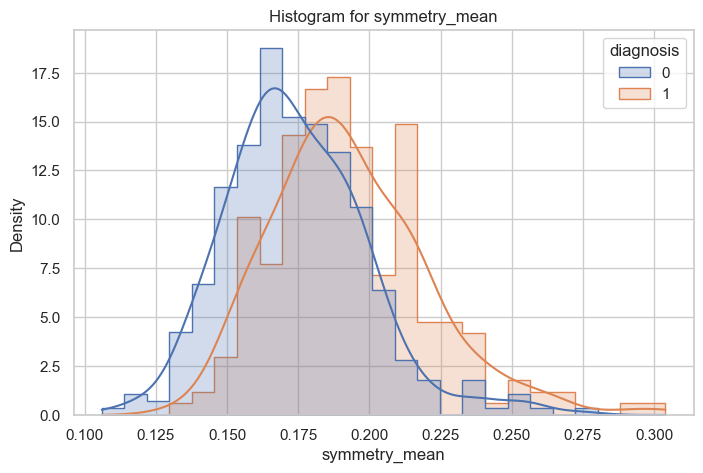

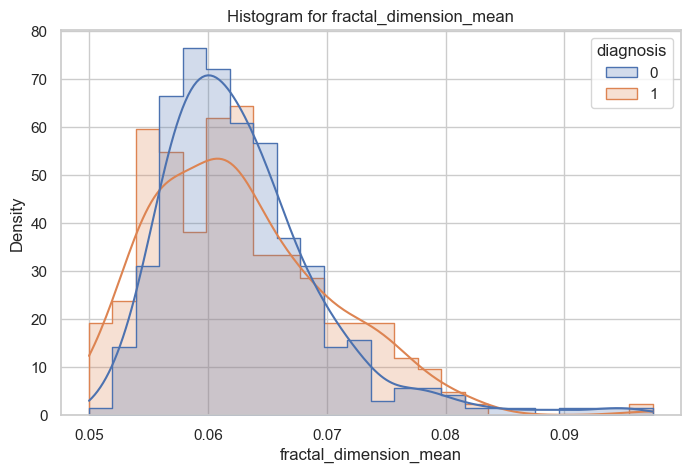

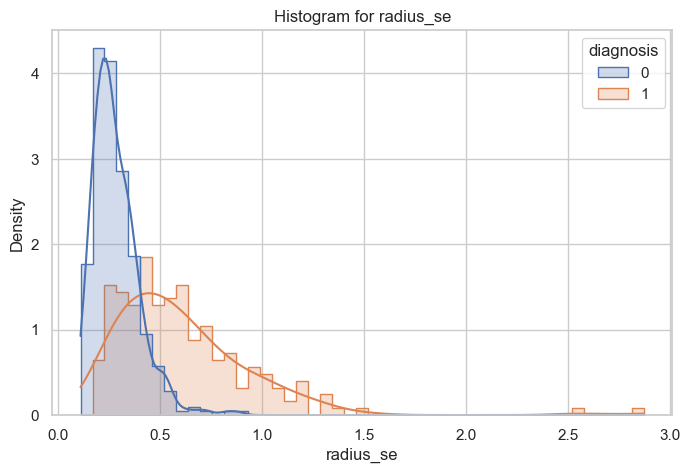

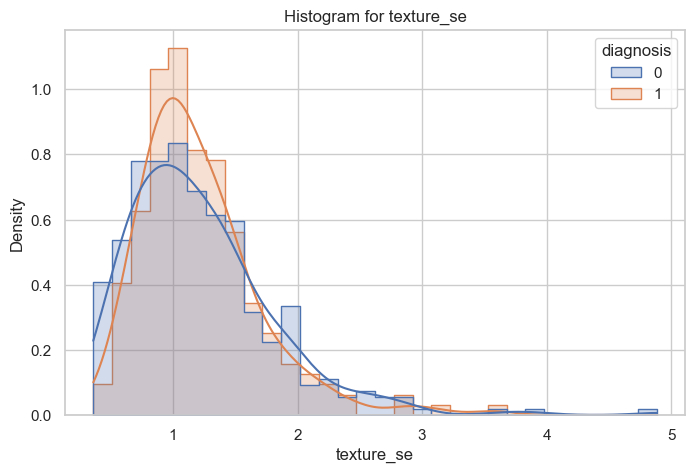

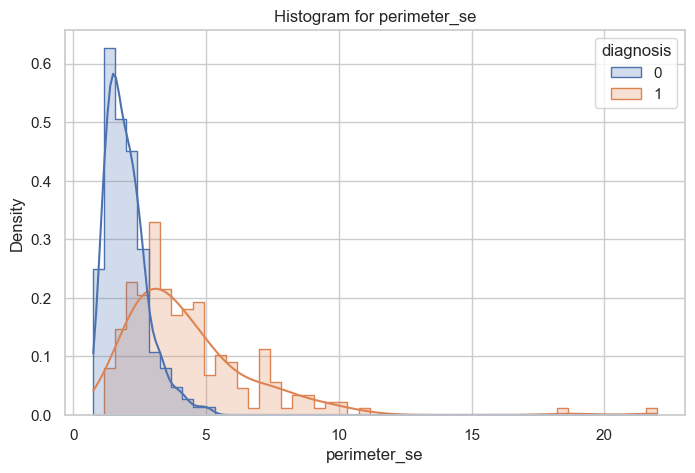

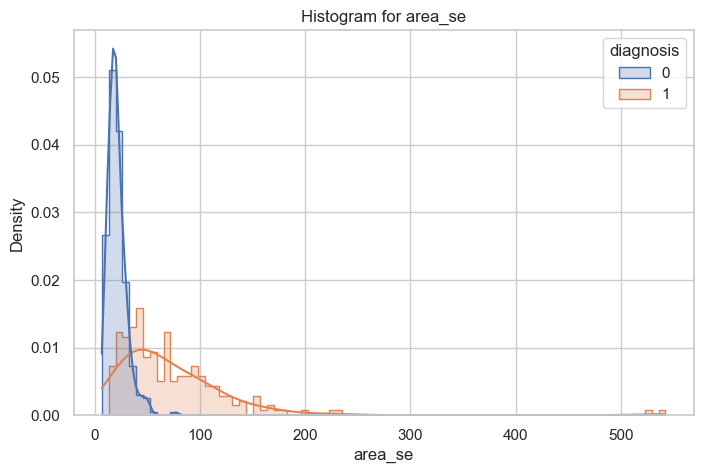

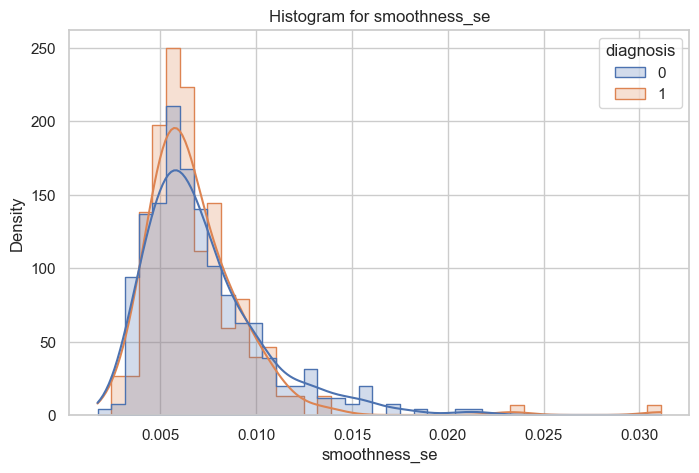

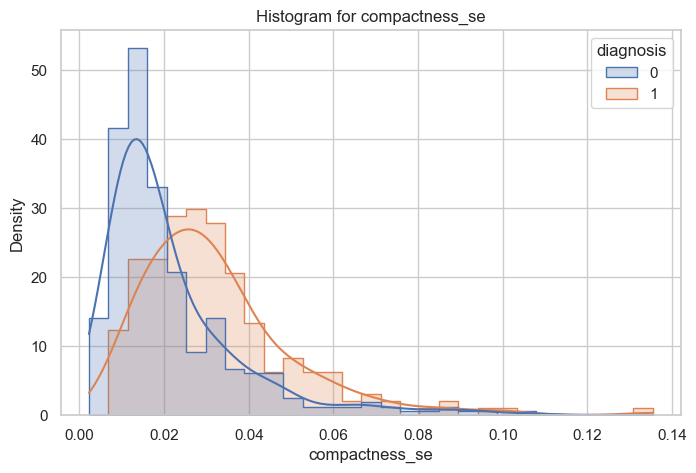

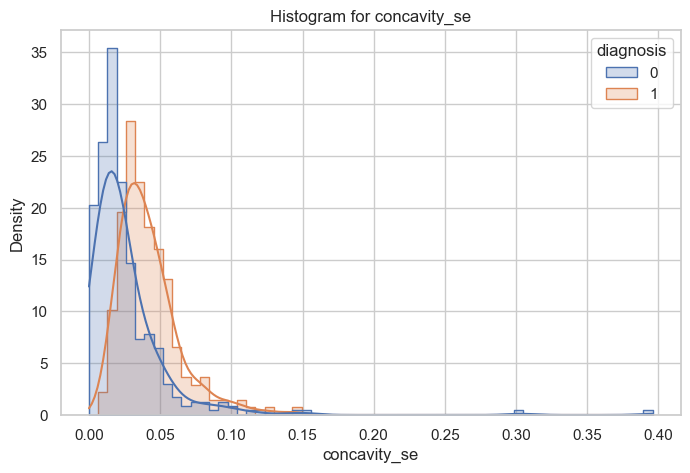

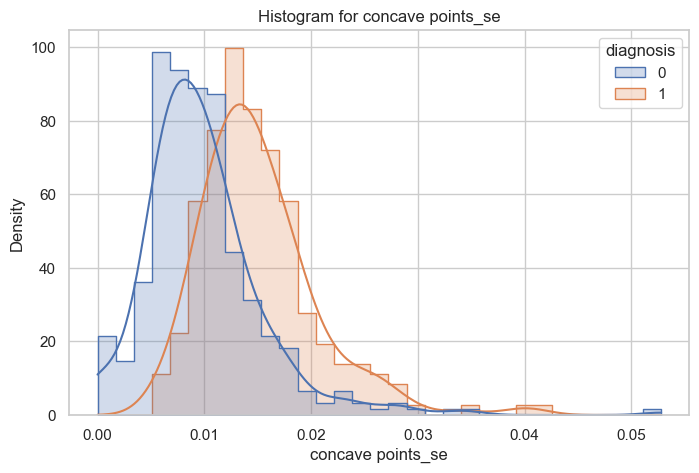

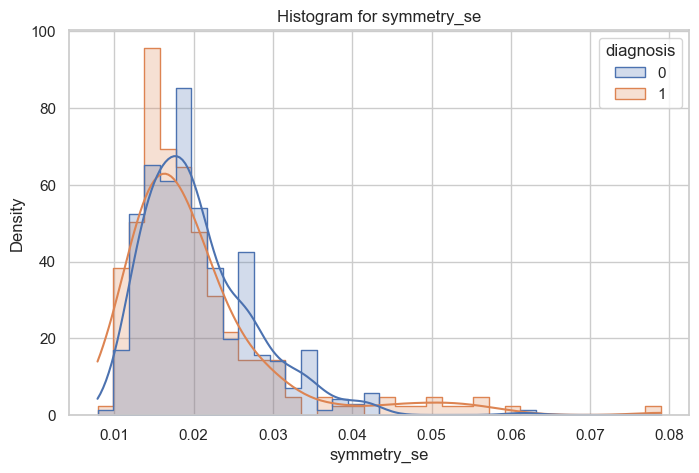

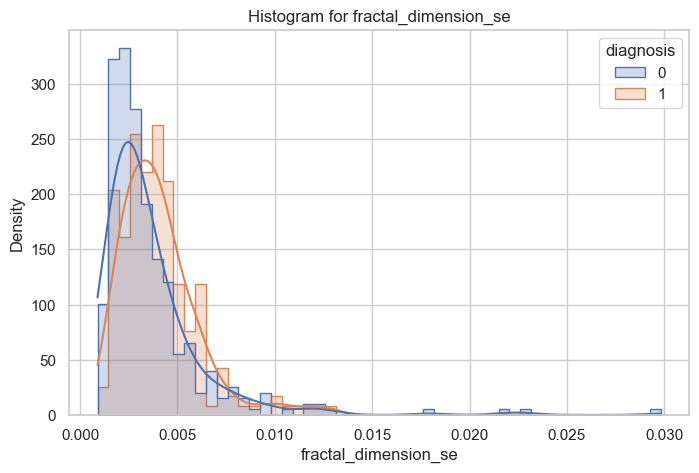

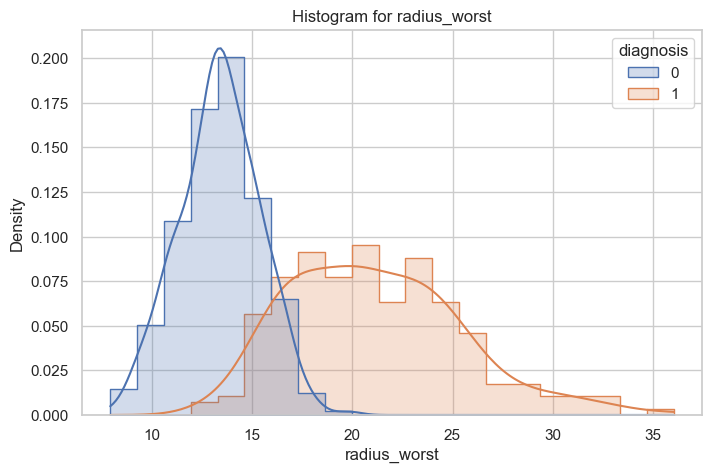

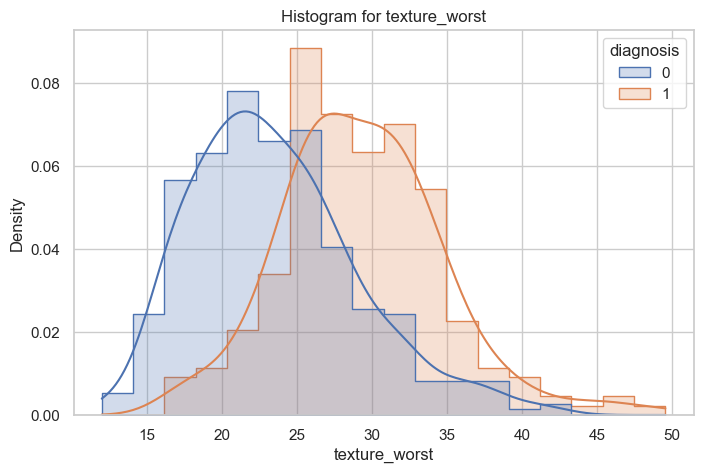

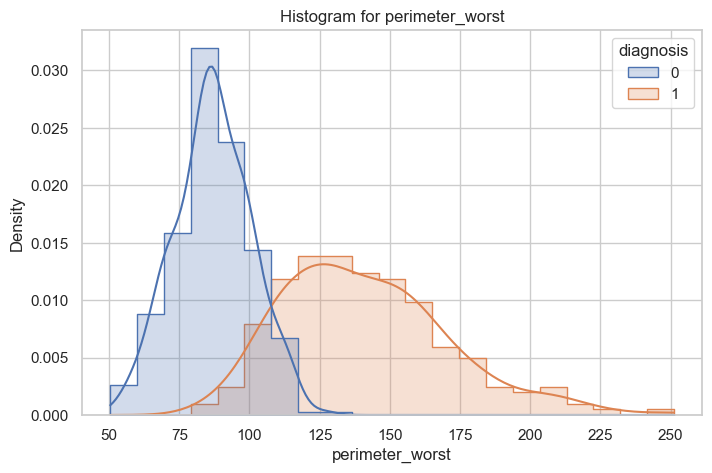

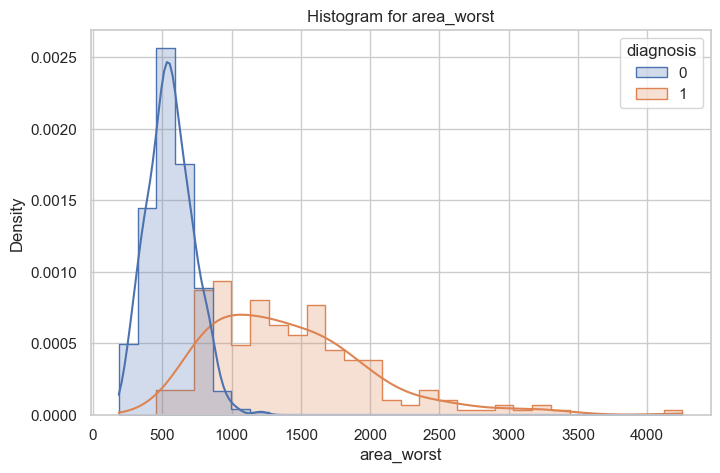

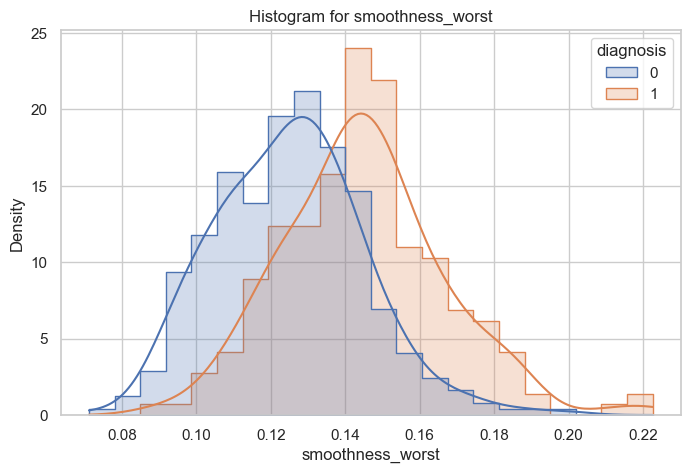

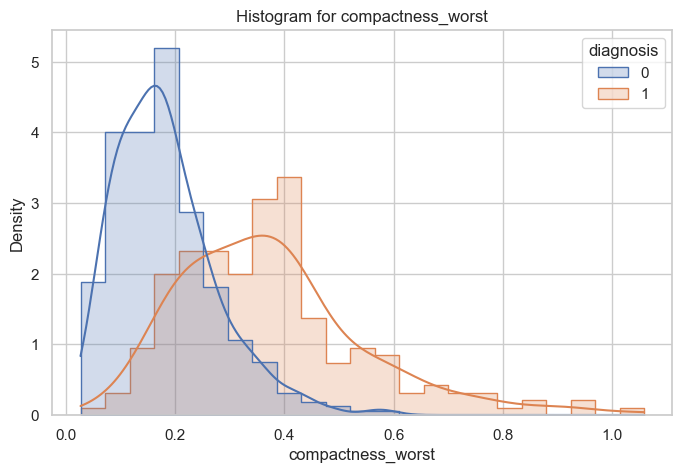

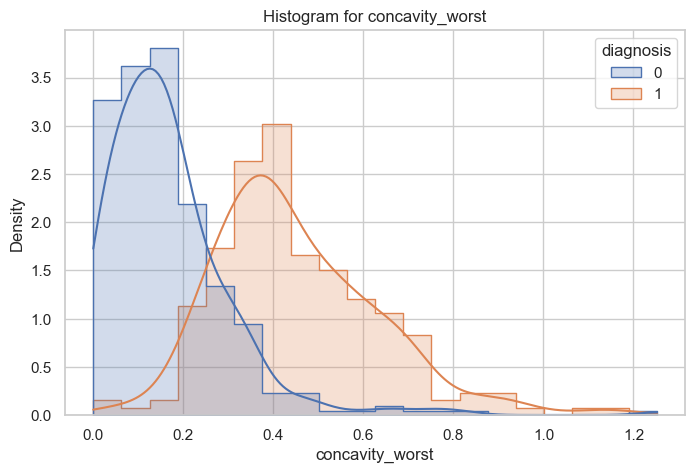

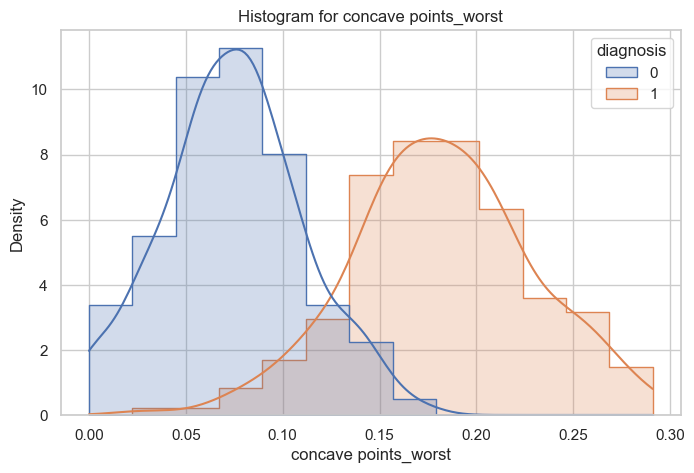

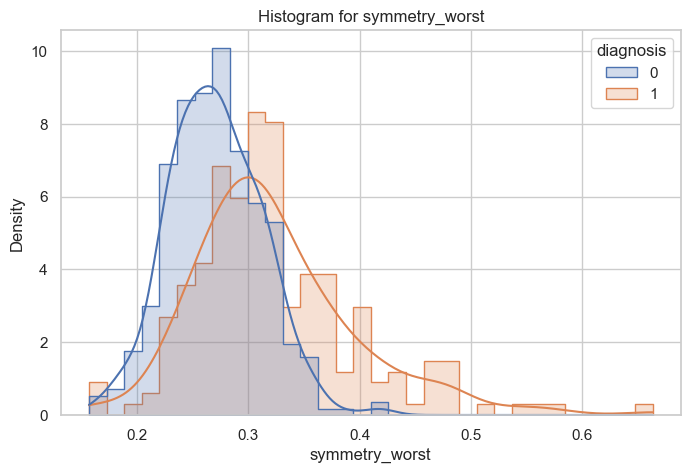

In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Exclude the "id" and "Unnamed: 32" columns from the analysis
features = df.columns[2:-1]

# Plot histograms for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue="diagnosis", element="step", common_norm=False, stat="density", kde=True)
    plt.title(f'Histogram for {feature}')
    plt.show()

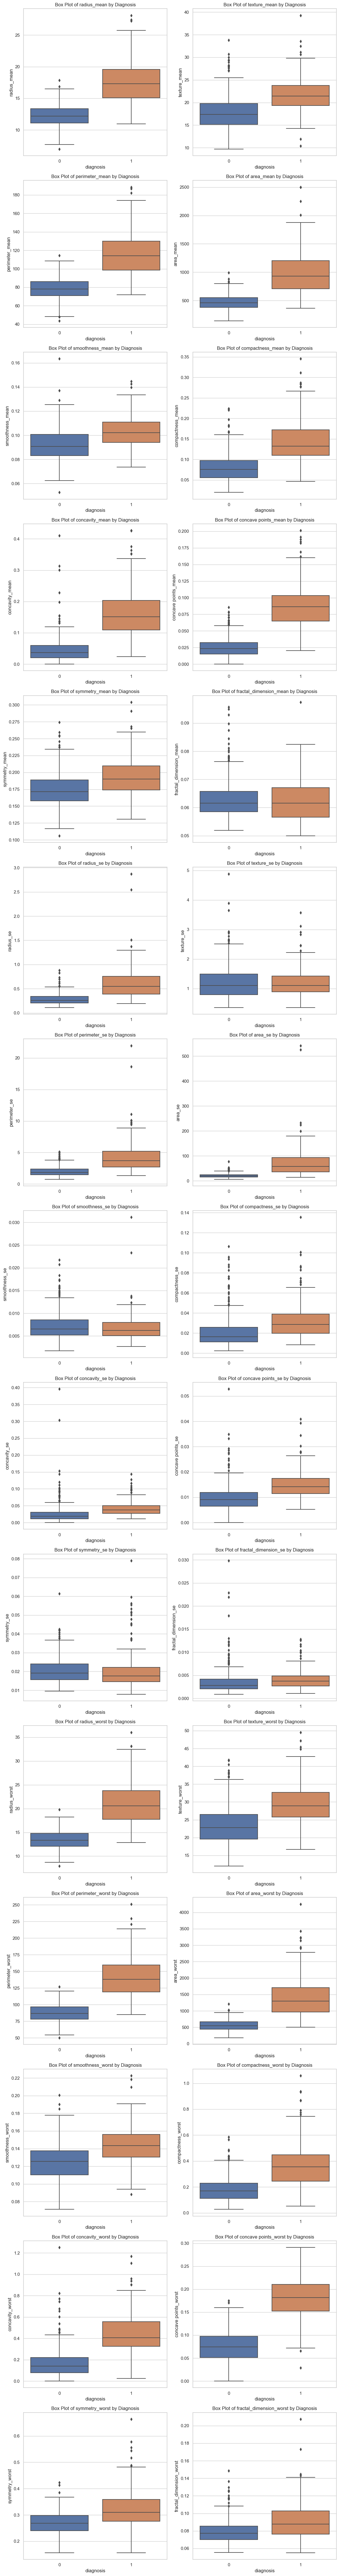

In [14]:
# Select all features except 'diagnosis'
features_to_plot = df.columns[2:]  # Assuming the first two columns are 'id' and 'diagnosis'

# Calculate the number of rows and columns for subplots
num_features = len(features_to_plot)
num_cols = 2
num_rows = (num_features + 1) // num_cols

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows))

# Loop through features and create box plots
for i, feature in enumerate(features_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(data=df, x='diagnosis', y=feature, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Box Plot of {feature} by Diagnosis')

# Remove empty subplots, if any
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


## Observations-
observing the above box plots we can conclude that some features are good classified with respect to the target feature Diganosis and some features are badly classified.

In the good classification we can distinguish between "B" and "M" means they are at some point seperated.

**good classified** - radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,primeter_worst,area_worst,concavity_worst,concave points_worst


**not classified** -texture_mean,smoothness_mean,compactness_se,concave points_se,texture_worst, smoothness_worst, compactness_worst,symmetry_worst,, symmetry_mean,fractal_dimension_mean ,texture_se,smoothness_se ,concavity_se,symmetry_se ,fractal_dimension_se

In [15]:
good_classified = ["radius_mean", "perimeter_mean", "area_mean", "compactness_mean", "concavity_mean", "concave points_mean", "radius_se", "perimeter_se", "area_se", "radius_worst", "perimeter_worst", "area_worst", "concavity_worst", "concave points_worst"]


## decisions
- Here we are only keep the good classified features.

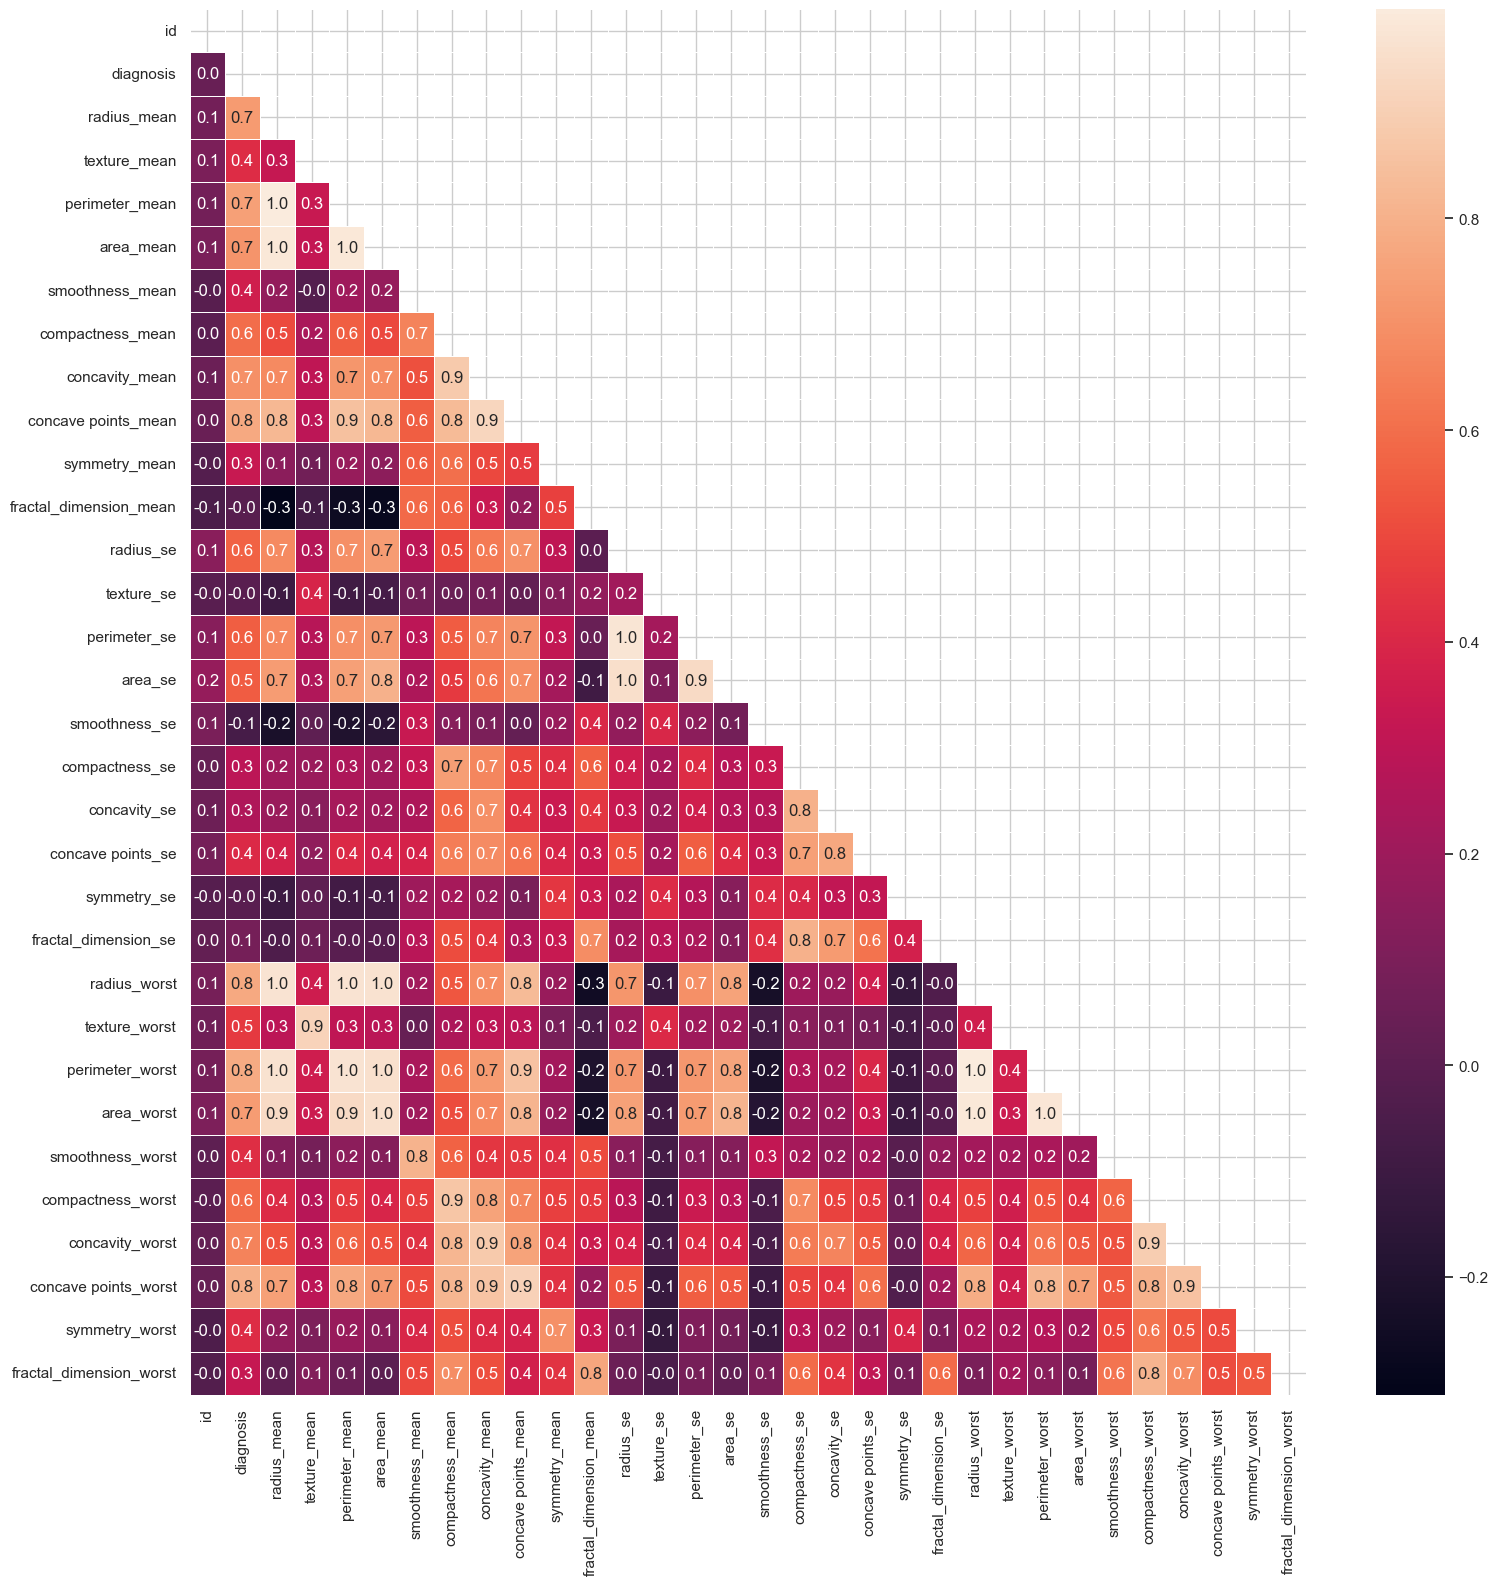

In [16]:
# here we are finding the important features and features that are not correlated with each other.
# first find the correlated features 
f,ax = plt.subplots(figsize=(18, 18))
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot=True,linewidths=.5,mask=mask,fmt= '.1f',ax=ax)
plt.show()

In [17]:
# Set the correlation threshold
correlation_threshold = 0.8

# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle_corr = df.corr().abs().where(np.triu(np.ones(df.corr().shape), k=1).astype(bool))

# Find the highly correlated features
highly_correlated_features = [column for column in upper_triangle_corr.columns if any(upper_triangle_corr[column] > correlation_threshold)]

# Display the highly correlated features
print("Highly correlated features:")
print(highly_correlated_features)

Highly correlated features:
['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


## Observations from the correlation matrix:

1. **Highly Correlated Features:**
   - `radius_mean`, `perimeter_mean`, and `area_mean` show strong correlations among themselves, which is expected as these features are interrelated geometrically.
   - Similarly, `radius_worst`, `perimeter_worst`, and `area_worst` also exhibit high correlations among themselves.
   - `concavity_mean`, `concave points_mean`, `concavity_worst`, and `concave points_worst` are also strongly correlated with each other.
   - There are other moderately correlated features throughout the matrix.

2. **Features to Consider Dropping:**
   - Given the high correlations between certain features, might consider dropping some to avoid multicollinearity in models, which could affect their predictive power.  between `radius_mean`, `perimeter_mean`, and `area_mean` or between `radius_worst`, `perimeter_worst`, and `area_worst`. Similarly, in the case of correlated pairs like `concavity_mean`, `concave points_mean`, `concavity_worst`, and `concave points_worst`.

3. **Strong Positive Correlations with Diagnosis:**
   - Some features like `radius_mean`, `perimeter_mean`, `area_mean`, `concavity_mean`, `concave points_mean`, `radius_worst`, `perimeter_worst`, `area_worst`, `concavity_worst`, and `concave points_worst` show considerable positive correlations with the target feature `diagnosis`, indicating their importance in distinguishing the diagnosis.



## Decisions
Certainly, we keep `radius_mean`, `radius_worst`, and `concavity_mean` and consider dropping other correlated features.

1. **Keep:**
   - `radius_mean`
   - `radius_worst`
   - `concavity_mean`

2. **Consider Dropping:**
   - `perimeter_mean` (highly correlated with `radius_mean`)
   - `area_mean` (highly correlated with `radius_mean`)
   - `perimeter_worst` (highly correlated with `radius_worst`)
   - `area_worst` (highly correlated with `radius_worst`)
   - `concavity_worst` (highly correlated with `concavity_mean`)
   - `concave points_worst` (highly correlated with `concavity_mean`)


In [18]:
drop_features=["perimeter_mean","area_mean","perimeter_worst","area_worst","concavity_worst","concave points_worst"]

### ***"Finding the Important Features"***
##### finding the Important Features using the Random forest and SelectKbest

In [19]:
# Separate features and target variable
X = df.drop(['diagnosis'], axis=1)  # Adjust columns as needed
y = df['diagnosis']

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Display the top 10 features
print("Top 10 features:")
print(top_features)



Top 10 features:
                 Feature  Importance
24            area_worst    0.130888
21          radius_worst    0.127435
28  concave points_worst    0.115075
23       perimeter_worst    0.108887
8    concave points_mean    0.098230
3         perimeter_mean    0.048581
27       concavity_worst    0.048050
7         concavity_mean    0.047817
4              area_mean    0.046152
14               area_se    0.041656


In [20]:
important_features_RF=top_features.Feature.values

In [21]:
# Assuming df is your DataFrame containing the dataset
# Assuming 'diagnosis' is the target variable (change it based on your dataset)

# Separate features and target variable
X = df.drop(['diagnosis','id'], axis=1)  # Adjust columns as needed
y = df['diagnosis']

# Initialize SelectKBest with the chi-squared test
k_best = SelectKBest(score_func=chi2, k=10)

# Fit the SelectKBest model to the data and transform the features
X_k_best = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = k_best.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame to store selected features
selected_features_df = pd.DataFrame({'Feature': selected_feature_names})

# Display the selected features
print("Selected features using SelectKBest:")
print(selected_features_df)


Selected features using SelectKBest:
           Feature
0      radius_mean
1     texture_mean
2   perimeter_mean
3        area_mean
4     perimeter_se
5          area_se
6     radius_worst
7    texture_worst
8  perimeter_worst
9       area_worst


In [22]:
important_features_SKB=selected_features_df.Feature.values

### Selecting the important Features  
#### Here we are creating the two new data frames as selected_features_rf_skb and selected_features_good_classified

**Creating the selected_features_rf_skb**

We are identifying the features that are important for our analysis. These features are a combination of those selected using **SelectKBest (important_features_SkB)**, and those identified by a machine learning model **(important_features_RF)**. We then create a new dataset **(selected_features_rf_skb)** using these common important features while excluding that features which are correlated with each other, we want to drop **(drop_features).**

In [23]:
#important_features=((set(important_features_SKB).union(important_features_RF)).intersection(good_classified)).difference(drop_features)
important_features=(set(important_features_SKB).intersection(good_classified)).union(set(important_features_RF).intersection(good_classified))


In [24]:
selected_features_rf_skb=df[important_features.difference(set(drop_features))]
selected_features_rf_skb

C:\Users\Admin\AppData\Local\Temp\ipykernel_15260\445928167.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  selected_features_rf_skb=df[important_features.difference(set(drop_features))]


perimeter_se  concavity_mean  radius_worst  area_se  radius_mean  \
0          8.5890        0.300100        25.380  153.400       17.990   
1          3.3980        0.086900        24.990   74.080       20.570   
2          4.5850        0.197400        23.570   94.030       19.690   
3          3.4450        0.241400        14.910   27.230       11.420   
4          5.4380        0.198000        22.540   94.440       20.290   
5          2.2170        0.157800        15.470   27.190       12.450   
6          3.1800        0.112700        22.880   53.910       18.250   
7          3.8560        0.093660        17.060   50.960       13.710   
8          2.4060        0.185900        15.490   24.320       13.000   
9          2.0390        0.227300        15.090   23.940       12.460   
10         2.4660        0.032990        19.190   40.510       16.020   
11         3.5640        0.099540        20.420   54.160       15.780   
12        11.0700        0.206500        20.960  116.200       19.170   
13         2.9030        0.099380        16.840   36.580       15.850   
14         2.0610        0.212800        15.030   19.210       13.730   
15         2.8790        0.163900        17.460   32.550       14.540   
16         3.1950        0.073950        19.070   45.400       14.680   
17         3.8540        0.172200        20.960   54.180       16.130   
18         5.8650        0.147900        27.320  112.400       19.810   
19         2.0580        0.066640        15.110   23.560       13.540   
20         1.3830        0.045680        14.500   14.670       13.080   
21         1.9090        0.029560        10.230   15.700        9.504   
22         3.3840        0.207700        18.070   44.910       15.340   
23         4.3030        0.109700        29.170   93.990       21.160   
24         5.4550        0.152500        26.460  102.600       16.650   
25         7.2760        0.222900        22.250  111.400       17.140   
26         2.1100        0.142500        17.620   21.050       14.580   
27         5.6320        0.149000        21.310   93.540       18.610   
28         3.4980        0.168300        20.270   43.500       15.300   
29         4.6550        0.098750        20.010   61.100       17.570   
30         5.5740        0.231900        23.150  105.000       18.630   
31         3.4750        0.121800        16.820   41.000       11.840   
32         3.9990        0.241700        20.880   67.780       17.020   
33         3.5280        0.165700        24.150   68.170       19.270   
34         2.1830        0.135400        20.210   35.030       16.130   
35         3.0080        0.134800        20.010   45.190       16.740   
36         2.6570        0.131900        15.890   24.910       14.250   
37         1.1700        0.025620        13.300   14.160       13.030   
38         8.0770        0.023980        14.990  106.000       14.990   
39         1.5450        0.106300        15.530   18.520       13.480   
40         1.5720        0.031100        15.930   20.530       13.440   
41         1.8220        0.104400        12.840   16.970       10.950   
42         8.8300        0.210700        24.090  104.900       19.070   
43         2.4270        0.098470        17.380   31.330       13.280   
44         1.3340        0.082590        16.230   14.490       13.170   
45         4.2930        0.197400        22.820   71.560       18.650   
46         1.0940        0.015880         8.964    8.205        8.196   
47         1.8970        0.122600        15.670   24.250       13.170   
48         1.8480        0.065920        13.760   19.870       12.050   
49         1.7350        0.047510        15.150   20.200       13.490   
50         2.6350        0.016570        12.980   28.470       11.760   
51         1.4490        0.018570        14.670   14.550       13.640   
52         1.5200        0.019720        13.100   17.470       11.940   
53         4.8770        0.177200        20.600   98.810       

**Creating the selected_features_good_classified**

Here we are finding the features that are important for analysis. we are droping the highly correlated features from the good classified features. Then we are creating the new dataset called as ***selected_features_good_classified***

In [25]:
selected_features_good_classified=df[set(good_classified).difference(set(drop_features))]

C:\Users\Admin\AppData\Local\Temp\ipykernel_15260\1550880770.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  selected_features_good_classified=df[set(good_classified).difference(set(drop_features))]


In [26]:
selected_features_good_classified

perimeter_se  concave points_mean  concavity_mean  radius_worst  \
0          8.5890             0.147100        0.300100        25.380   
1          3.3980             0.070170        0.086900        24.990   
2          4.5850             0.127900        0.197400        23.570   
3          3.4450             0.105200        0.241400        14.910   
4          5.4380             0.104300        0.198000        22.540   
5          2.2170             0.080890        0.157800        15.470   
6          3.1800             0.074000        0.112700        22.880   
7          3.8560             0.059850        0.093660        17.060   
8          2.4060             0.093530        0.185900        15.490   
9          2.0390             0.085430        0.227300        15.090   
10         2.4660             0.033230        0.032990        19.190   
11         3.5640             0.066060        0.099540        20.420   
12        11.0700             0.111800        0.206500        20.960   
13         2.9030             0.053640        0.099380        16.840   
14         2.0610             0.080250        0.212800        15.030   
15         2.8790             0.073640        0.163900        17.460   
16         3.1950             0.052590        0.073950        19.070   
17         3.8540             0.102800        0.172200        20.960   
18         5.8650             0.094980        0.147900        27.320   
19         2.0580             0.047810        0.066640        15.110   
20         1.3830             0.031100        0.045680        14.500   
21         1.9090             0.020760        0.029560        10.230   
22         3.3840             0.097560        0.207700        18.070   
23         4.3030             0.086320        0.109700        29.170   
24         5.4550             0.091700        0.152500        26.460   
25         7.2760             0.140100        0.222900        22.250   
26         2.1100             0.087830        0.142500        17.620   
27         5.6320             0.077310        0.149000        21.310   
28         3.4980             0.087510        0.168300        20.270   
29         4.6550             0.079530        0.098750        20.010   
30         5.5740             0.124400        0.231900        23.150   
31         3.4750             0.051820        0.121800        16.820   
32         3.9990             0.120300        0.241700        20.880   
33         3.5280             0.075930        0.165700        24.150   
34         2.1830             0.077520        0.135400        20.210   
35         3.0080             0.060180        0.134800        20.010   
36         2.6570             0.055980        0.131900        15.890   
37         1.1700             0.029230        0.025620        13.300   
38         8.0770             0.028990        0.023980        14.990   
39         1.5450             0.054390        0.106300        15.530   
40         1.5720             0.020310        0.031100        15.930   
41         1.8220             0.056690        0.104400        12.840   
42         8.8300             0.099610        0.210700        24.090   
43         2.4270             0.061580        0.098470        17.380   
44         1.3340             0.052520        0.082590        16.230   
45         4.2930             0.100900        0.197400        22.820   
46         1.0940             0.005917        0.015880         8.964   
47         1.8970             0.073400        0.122600        15.670   
48         1.8480             0.027490        0.065920        13.760   
49         1.7350             0.033840        0.047510        15.150   
50         2.6350             0.011150        0.016570        12.980   
51         1.4490             0.017230        0.018570        14.670   
52         1.5200             0.013490        0.019720        13.100   
53         4.8770             0.106000        0.177200        20.600   
54         2.0970             0.033340       


After preprocessing the data, including feature selection and handling missing values,
the following code focuses on building machine learning models and evaluating their performances.

The dataset has been preprocessed with feature selection and removal of missing values.
Now, the data is split into training and testing sets, and standardization is applied to ensure uniformity.

The code contains three main parts:
Part 1: Model Evaluation Before Hyperparameter Tuning
- Utilizes various classification models without hyperparameter tuning.
- Calculates accuracy scores and generates classification reports for each model.
- Identifies the best-performing model based on accuracy.

Part 2: Hyperparameter Tuning
- Defines hyperparameter grids for different models.
- Conducts hyperparameter tuning using GridSearchCV to find the best combination of hyperparameters for each model.

Part 3: Model Evaluation After Hyperparameter Tuning
- Evaluates the models after hyperparameter tuning.
- Determines the best model post-tuning based on accuracy metrics.


## 3. Model Building,Evaluation and Tuning

## For the selected_features_rf_skb

### Part 1: Model Evaluation Before Hyperparameter Tuning

In [27]:
# Assuming new_df2 is your dataframe and 'diagnosis' is the target variable
X = selected_features_rf_skb
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Train, evaluate, and select the best model
best_model = None
best_accuracy = 0

# Store accuracy scores and classification reports for all models
results = {}

for name, model in classifiers.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'classification_report': classification_rep}

    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_rep}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with Accuracy: {best_accuracy}")


Random Forest Accuracy: 0.9473684210526315
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Logistic Regression Accuracy: 0.956140350877193
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM Accuracy: 0.9473684210526315
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
      

### Part 2: Hyperparameter Tuning


In [28]:

# Define hyperparameter grids for each model
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNeighbors': {'n_neighbors': [3, 5, 7, 9]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Naive Bayes': {},  # No hyperparameters for GaussianNB
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Perform hyperparameter tuning for each model
best_models = {}

for name, model in classifiers.items():
    param_grid = param_grids.get(name, {})
    
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        best_models[name] = grid_search.best_estimator_
        
        print(f"Best Hyperparameters for {name}: {grid_search.best_params_}")


Best Hyperparameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Best Hyperparameters for Logistic Regression: {'C': 10}
Best Hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best Hyperparameters for KNeighbors: {'n_neighbors': 5}
Best Hyperparameters for Decision Tree: {'max_depth': None}
Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 200}
Best Hyperparameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}


### Part 3: Model Evaluation After Hyperparameter Tuning


In [29]:
# Evaluate and select the best model after hyperparameter tuning
best_model_after_tuning = None
best_accuracy_after_tuning = 0

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} Accuracy after Hyperparameter Tuning: {accuracy}")

    if accuracy > best_accuracy_after_tuning:
        best_accuracy_after_tuning = accuracy
        best_model_after_tuning = model

print(f"\nBest Model after Hyperparameter Tuning: {type(best_model_after_tuning).__name__} with Accuracy: {best_accuracy_after_tuning}")


Random Forest Accuracy after Hyperparameter Tuning: 0.9473684210526315
Logistic Regression Accuracy after Hyperparameter Tuning: 0.9649122807017544
SVM Accuracy after Hyperparameter Tuning: 0.9824561403508771
KNeighbors Accuracy after Hyperparameter Tuning: 0.9473684210526315
Decision Tree Accuracy after Hyperparameter Tuning: 0.9122807017543859
Gradient Boosting Accuracy after Hyperparameter Tuning: 0.9385964912280702
AdaBoost Accuracy after Hyperparameter Tuning: 0.9385964912280702

Best Model after Hyperparameter Tuning: SVC with Accuracy: 0.9824561403508771


## For the selected_features_good_classified

### Part 1: Model Evaluation Before Hyperparameter Tuning

In [30]:
# Assuming new_df2 is your dataframe and 'diagnosis' is the target variable
X = selected_features_good_classified
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Train, evaluate, and select the best model
best_model = None
best_accuracy = 0

# Store accuracy scores and classification reports for all models
results = {}

for name, model in classifiers.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'classification_report': classification_rep}

    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_rep}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with Accuracy: {best_accuracy}")


Random Forest Accuracy: 0.9473684210526315
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Logistic Regression Accuracy: 0.956140350877193
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM Accuracy: 0.956140350877193
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
       

###  Part 2: Hyperparameter Tuning

In [31]:
# Define hyperparameter grids for each model
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNeighbors': {'n_neighbors': [3, 5, 7, 9]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Naive Bayes': {},  # No hyperparameters for GaussianNB
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Perform hyperparameter tuning for each model
best_models = {}

for name, model in classifiers.items():
    param_grid = param_grids.get(name, {})
    
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        best_models[name] = grid_search.best_estimator_
        
        print(f"Best Hyperparameters for {name}: {grid_search.best_params_}")


Best Hyperparameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Best Hyperparameters for Logistic Regression: {'C': 10}
Best Hyperparameters for SVM: {'C': 10, 'kernel': 'linear'}
Best Hyperparameters for KNeighbors: {'n_neighbors': 7}
Best Hyperparameters for Decision Tree: {'max_depth': None}
Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}
Best Hyperparameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}


### Part 3: Model Evaluation After Hyperparameter Tuning

In [32]:
# Evaluate and select the best model after hyperparameter tuning
best_model_after_tuning = None
best_accuracy_after_tuning = 0

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} Accuracy after Hyperparameter Tuning: {accuracy}")

    if accuracy > best_accuracy_after_tuning:
        best_accuracy_after_tuning = accuracy
        best_model_after_tuning = model

print(f"\nBest Model after Hyperparameter Tuning: {type(best_model_after_tuning).__name__} with Accuracy: {best_accuracy_after_tuning}")


Random Forest Accuracy after Hyperparameter Tuning: 0.956140350877193
Logistic Regression Accuracy after Hyperparameter Tuning: 0.9649122807017544
SVM Accuracy after Hyperparameter Tuning: 0.9912280701754386
KNeighbors Accuracy after Hyperparameter Tuning: 0.956140350877193
Decision Tree Accuracy after Hyperparameter Tuning: 0.9122807017543859
Gradient Boosting Accuracy after Hyperparameter Tuning: 0.9385964912280702
AdaBoost Accuracy after Hyperparameter Tuning: 0.956140350877193

Best Model after Hyperparameter Tuning: SVC with Accuracy: 0.9912280701754386


## Observation
`selected_features_rf_skb` and `selected_features_good_classified`:

### For `selected_features_rf_skb`:
- **AdaBoost Classifier** achieved the highest accuracy of 96.49%.
- Other models performed well too, with SVM, Logistic Regression, and KNeighbors reaching around 94-95% accuracy.
- Post hyperparameter tuning, **SVM reached an accuracy of 98.24%**, becoming the best-performing model.

### For `selected_features_good_classified`:
- Similar performance was observed in models compared to `selected_features_rf_skb`, with AdaBoost, SVM, Logistic Regression, and KNeighbors achieving accuracies around 94-95%.
- Post hyperparameter tuning, **SVM reached an accuracy of 99.12%**, making it the best-performing model.

### Conclusions:
- The AdaBoost, SVM, Logistic Regression, and KNeighbors models showed consistent performance in both datasets.
- SVM, particularly after hyperparameter tuning, exhibited the highest accuracy, achieving 98.24% and 99.12% for `selected_features_rf_skb` and `selected_features_good_classified`, respectively.
- The choice of feature selection methods might affect the performance of models, showcasing slight variations in accuracy and predictive capability.

In summary, **SVM with hyperparameter tuning** on the `selected_features_good_classified` dataset seems to yield the best predictive performance, attaining an accuracy of 99.12%, making it the recommended model for this dataset and feature selection strategy.

# Breast Cancer Wisconsin (Diagnostic) - Dataset Documentation

## Introduction

The Breast Cancer Wisconsin (Diagnostic) dataset is a widely used dataset in the field of machine learning for classification tasks. The dataset is derived from breast mass images and is utilized to diagnose whether a breast mass is malignant or benign. It presents a binary classification problem, making it a valuable resource for developing predictive models in healthcare.

## Dataset Overview

- **Source:** The dataset is sourced from the University of Wisconsin Hospitals, Madison, and provided by Dr. William H. Wolberg.

- **Format:** The dataset is available in a CSV (Comma-Separated Values) format.

- **Entries:** There are a total of 569 entries in the dataset.

- **Features:** The dataset consists of 33 columns, including 1 integer, 1 object (diagnosis), and 31 float64 features.

## Data Exploration

### Summary Statistics:

- **Numerical Features:** The dataset includes various features related to breast cancer diagnosis, such as mean, standard error, and worst values of attributes like radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension.

- **Categorical Feature:** The target variable is "diagnosis," indicating whether a breast mass is classified as malignant ('M') or benign ('B').

### Observations:

- Minimal missing values were observed, except for the "Unnamed: 32" column, which was subsequently dropped as it contained only missing values.

- Categorical variable "diagnosis" was efficiently encoded into numerical values ('B': 0, 'M': 1).

## Data Preprocessing

### Operations:

1. **Drop Irrelevant Column:**
   - The column "Unnamed: 32" was dropped due to containing no useful data.

2. **Categorical to Numerical Transformation:**
   - The "diagnosis" column was encoded into numerical values for model compatibility.

3. **Feature Selection:**
   - Features were analyzed for classification quality, multicollinearity, and importance.
   - Specific features were retained while considering good classification, excluding correlated features.

## Model Building and Evaluation

### Model Selection:

- The dataset was split into two subsets based on different feature selections:
  - `selected_features_rf_skb`: Features selected through Random Forest and SelectKBest.
  - `selected_features_good_classified`: Features classified as "good" based on visual analysis.

### Model Evaluation:

1. **Before Hyperparameter Tuning:**
   - Multiple classification models were applied, including Random Forest, Logistic Regression, SVM, KNeighbors, Decision Tree, Naive Bayes, Gradient Boosting, and AdaBoost.
   - Accuracy scores and classification reports were generated.

2. **Hyperparameter Tuning:**
   - GridSearchCV was employed to find optimal hyperparameters for models that supported tuning.

3. **After Hyperparameter Tuning:**
   - Models were re-evaluated after hyperparameter tuning.

### Best Model:

- For `selected_features_rf_skb`: SVM after hyperparameter tuning achieved the highest accuracy of 98.24%.

- For `selected_features_good_classified`: SVM after hyperparameter tuning reached the highest accuracy of 99.12%.

## Conclusion

- Consistent performance was observed in SVM, AdaBoost, Logistic Regression, and KNeighbors models across different feature selections.

- SVM, especially after hyperparameter tuning, demonstrated the highest accuracy, making it the recommended model for this dataset and feature selection strategy.

- The choice of feature selection methods influenced model performance, indicating slight variations in accuracy.

## Recommendations

- For accurate breast cancer diagnosis prediction, it is recommended to use the SVM model with hyperparameter tuning based on the `selected_features_good_classified` dataset.
